In [1]:
# Importing Required Libraries
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
import seaborn as sns
import warnings
import pandas as pd
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"Dataset.csv")
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


## Data Preprocessing

In [3]:
df.shape

(461, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [5]:
df.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [6]:
df.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

In [7]:
# Imputing the missing value of region record as the most common value
df['region'] = df['region'].fillna(2.)

In [8]:
uniqueval = df.nunique()
uniqueval

name            461
club             20
age              22
position         13
position_cat      4
market_value     48
page_views      389
fpl_value        17
fpl_sel         113
fpl_points      153
region            4
nationality      61
new_foreign       2
age_cat           6
club_id          20
big_club          2
new_signing       2
dtype: int64

In [9]:
df["region"] = df["region"].astype(int)
df['fpl_sel'] = df['fpl_sel'].replace('%','',regex=True).astype('float')
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.1,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.6,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.9,134,2,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.5,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.7,121,2,France,0,4,1,1,0


In [10]:
df['encoded_club'] = LabelEncoder().fit_transform(df['club'])
df['encoded_position'] = LabelEncoder().fit_transform(df['position'])
df['encoded_nationality'] = LabelEncoder().fit_transform(df['nationality'])

# 1. Use Seaborn to investigate the data and present your findings

In [11]:
df.corr()["market_value"].sort_values(ascending=False)

market_value           1.000000
fpl_value              0.788653
page_views             0.739657
fpl_points             0.615155
big_club               0.593483
fpl_sel                0.548703
new_signing            0.131321
region                 0.101629
new_foreign            0.098056
encoded_club          -0.046068
club_id               -0.046068
encoded_position      -0.070535
encoded_nationality   -0.107942
age_cat               -0.117682
age                   -0.132396
position_cat          -0.217637
Name: market_value, dtype: float64

In [12]:
df.dtypes

name                    object
club                    object
age                      int64
position                object
position_cat             int64
market_value           float64
page_views               int64
fpl_value              float64
fpl_sel                float64
fpl_points               int64
region                   int32
nationality             object
new_foreign              int64
age_cat                  int64
club_id                  int64
big_club                 int64
new_signing              int64
encoded_club             int32
encoded_position         int32
encoded_nationality      int32
dtype: object

<Axes: xlabel='position', ylabel='market_value'>

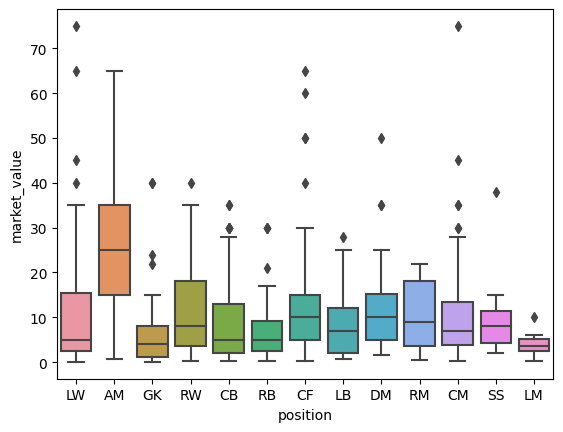

In [13]:
sns.boxplot(x='position', y='market_value', data=df)

<Axes: >

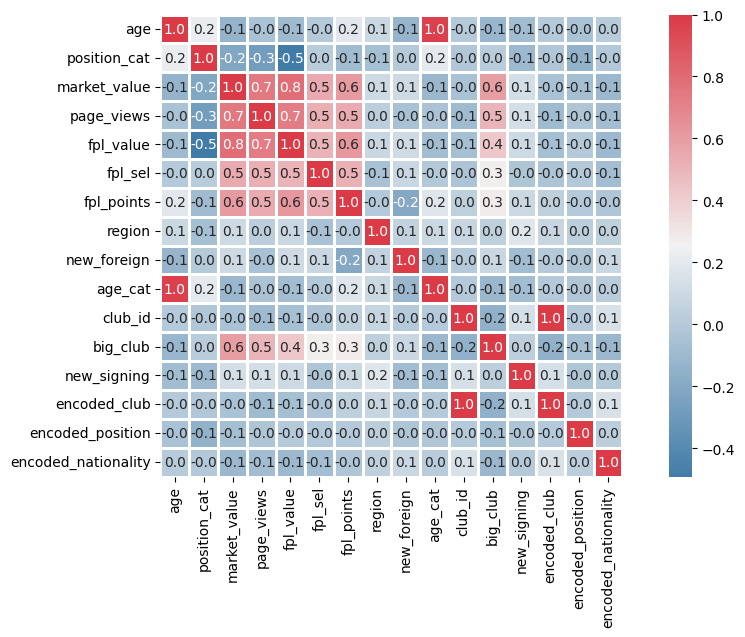

In [14]:
corr = df.corr()
f,ax = plt.subplots(figsize=(12,6))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),linewidth=1,fmt=".1f",ax=ax, cmap=sns.diverging_palette(240,10,as_cmap=True),square=True,annot=True)

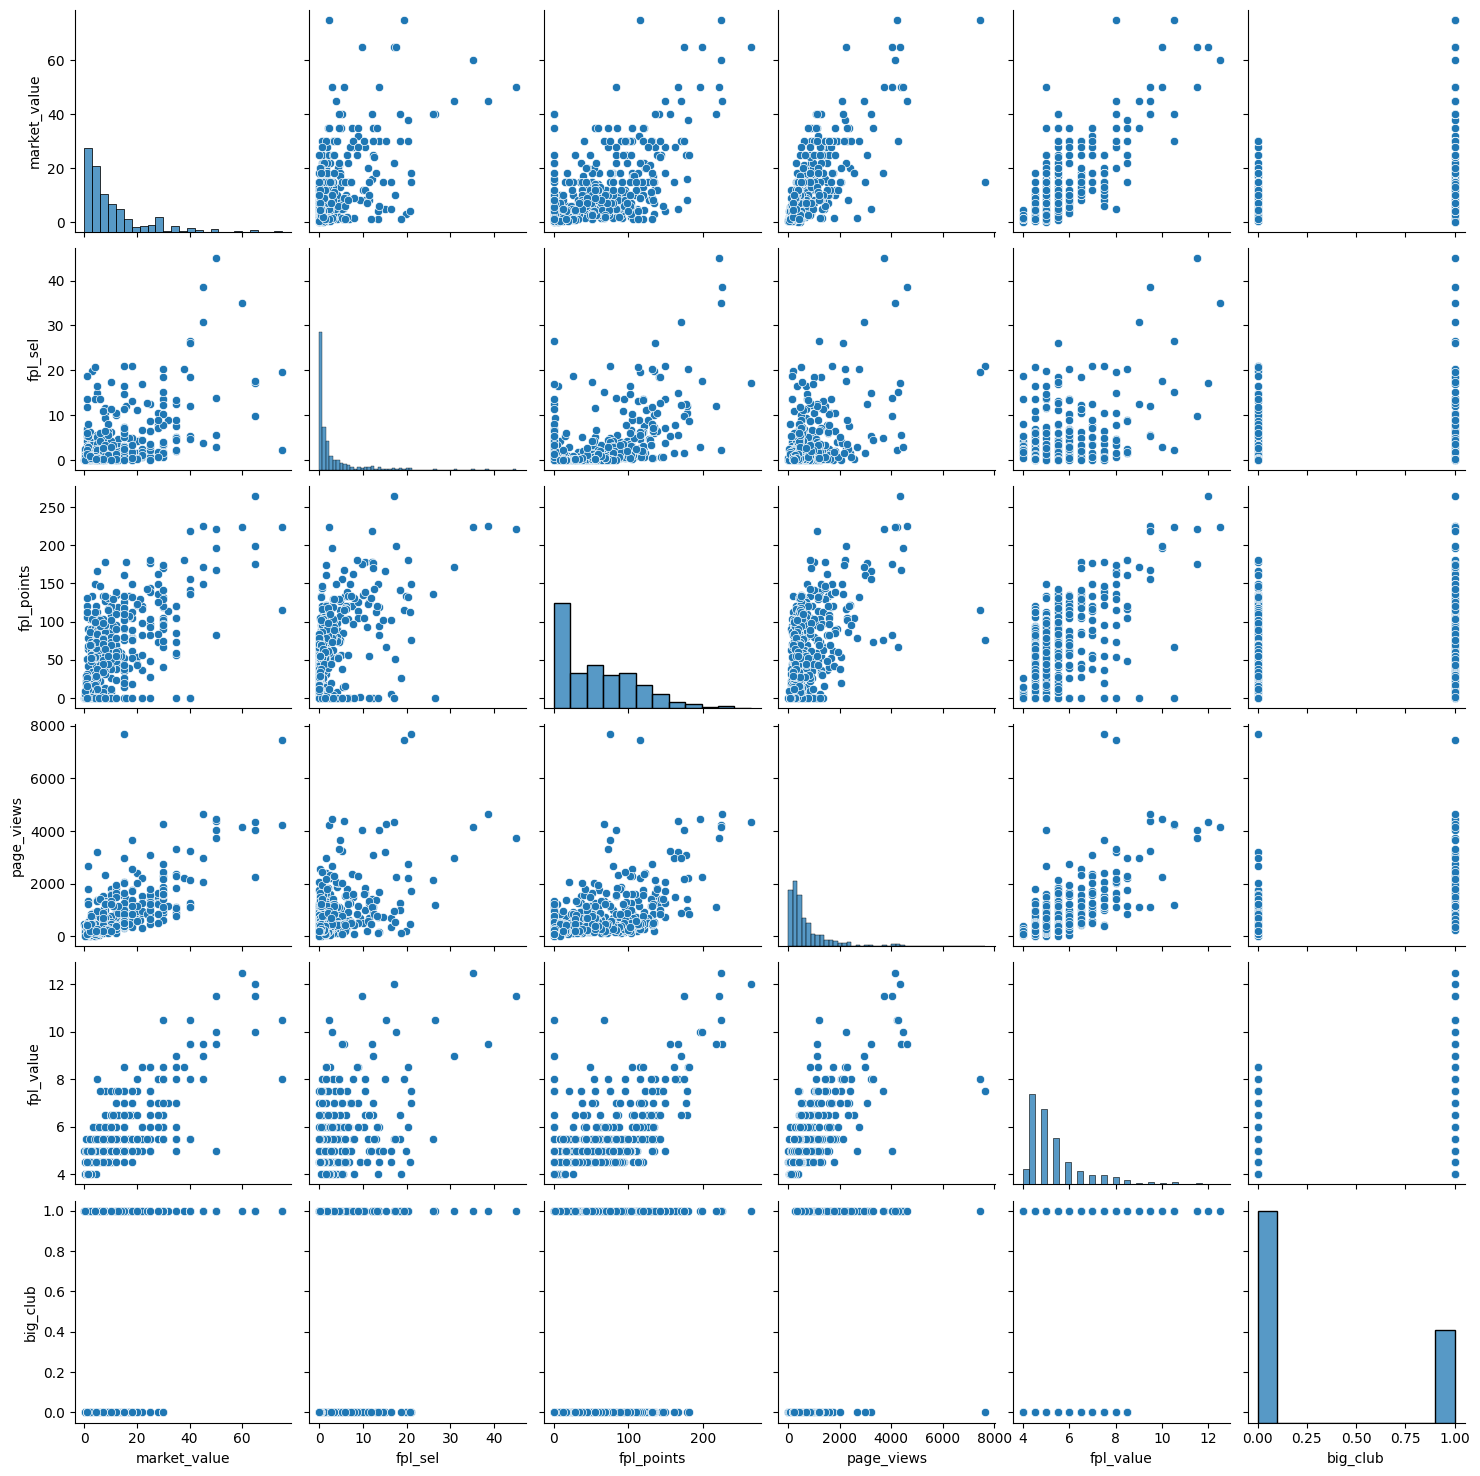

In [15]:
sns.pairplot(df, vars=['market_value', 'fpl_sel', 'fpl_points', 'page_views',"fpl_value","big_club"])

# 2. Build models using all the algorithms above to predict market_value

### Train Test Split

Since only fivecolumns are being correlated to market values, we  will take that columns only for building models

In [16]:
x = df[["page_views","fpl_value","fpl_sel","fpl_points","big_club"]]
y = df[["market_value"]]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(368, 5)
(93, 5)
(368, 1)
(93, 1)


In [18]:
# performin min max scaling on input data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train[x_train.columns[~x_train.columns.isin(["big_club"])]])
x_test = scaler.transform(x_test[x_test.columns[~x_test.columns.isin(["big_club"])]])

### Linear Regression

In [19]:
# Function to calculated cross validated scores

def KFoldVerify(model, X, Y):
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    r2_scores = cross_val_score(model, X, Y, cv= cv, scoring = 'r2')
    return r2_scores.mean()

In [20]:
# Fitting a Lasso Regressor
lasso_model = Lasso(alpha=0.1, max_iter = 10000)
cross_acc_train = KFoldVerify(lasso_model, x_train, y_train)
lasso_model.fit(x_train, y_train)

acc_train = lasso_model.score(x_train, y_train)
print("Cross Validation score - " + str(cross_acc_train))
print()


train_pred = lasso_model.predict(x_train)
mse_train = mean_squared_error(y_train,train_pred)
print("R^2 score of training data - " + str(acc_train))
print("Root Mean Square Error of training data - " + str(mse_train**(0.5)))

Cross Validation score - 0.575276844211826

R^2 score of training data - 0.6416820002778628
Root Mean Square Error of training data - 6.561426946573111


### Lasso Regression

In [21]:
# Fitting a Lasso Regressor
lasso_model = Lasso(alpha=0.1, max_iter = 10000)
cross_acc_train = KFoldVerify(lasso_model, x_train, y_train)
lasso_model.fit(x_train, y_train)

acc_train = lasso_model.score(x_train, y_train)
print("Cross Validation score - " + str(cross_acc_train))
print()


train_pred = lasso_model.predict(x_train)
mse_train = mean_squared_error(y_train,train_pred)
print("R^2 score of training data - " + str(acc_train))
print("Root Mean Square Error of training data - " + str(mse_train**(0.5)))

Cross Validation score - 0.575276844211826

R^2 score of training data - 0.6416820002778628
Root Mean Square Error of training data - 6.561426946573111


### Ridge Regression

In [22]:
# Fitting a Ridge Regressor
ridge_model = Ridge(alpha=0.1,max_iter=10000)
cross_acc_train = KFoldVerify(ridge_model, x_train, y_train)
ridge_model.fit(x_train, y_train)

acc_train = ridge_model.score(x_train, y_train)
print("Cross Validation score - " + str(cross_acc_train))
print()


train_pred = ridge_model.predict(x_train)
mse_train = mean_squared_error(y_train,train_pred)
print("R^2 score of training data - " + str(acc_train))
print("Root Mean Square Error of training data - " + str(mse_train**(0.5)))

Cross Validation score - 0.560679789317882

R^2 score of training data - 0.6501649530708522
Root Mean Square Error of training data - 6.483292909530165


### Nearest Neighbour Regression

In [23]:
# fitting a nearest neighbour regressor
K_neigh = KNeighborsRegressor(n_neighbors=10, metric='minkowski')
cross_acc_train = KFoldVerify(K_neigh, x_train, y_train)
K_neigh.fit(x_train, y_train)

acc_train = K_neigh.score(x_train, y_train)
print("Cross Validation score - " + str(cross_acc_train))
print()


train_pred = K_neigh.predict(x_train)
mse_train = mean_squared_error(y_train,train_pred)
print("R^2 score of training data - " + str(acc_train))
print("Root Mean Square Error of training data - " + str(mse_train**(0.5)))

Cross Validation score - 0.5301294714396788

R^2 score of training data - 0.6575032533239362
Root Mean Square Error of training data - 6.414934267598437


### Support Vector Regression

In [24]:
# fitting a support vector regressor
SVR_regr = SVR(C = 10000.0, epsilon=0.001, kernel='poly', degree=3)
cross_acc_train = KFoldVerify(SVR_regr, x_train, y_train)
SVR_regr.fit(x_train, y_train)

acc_train = SVR_regr.score(x_train, y_train)
print("Cross Validation score - " + str(cross_acc_train))
print()


train_pred = SVR_regr.predict(x_train)
mse_train = mean_squared_error(y_train,train_pred)
print("R^2 score of training data - " + str(acc_train))
print("Root Mean Square Error of training data - " + str(mse_train**(0.5)))

Cross Validation score - -1.0197850015731516

R^2 score of training data - 0.5568784102138924
Root Mean Square Error of training data - 7.296682352619912


### Tree Regression

In [25]:
# fitting a Decision Tree regressor
tree_model = DecisionTreeRegressor(random_state = 0,max_depth=5)  
cross_acc_train = KFoldVerify(tree_model, x_train, y_train)
tree_model.fit(x_train, y_train)

acc_train = tree_model.score(x_train, y_train)
print("Cross Validation score - " + str(cross_acc_train))
print()


train_pred = tree_model.predict(x_train)
mse_train = mean_squared_error(y_train,train_pred)
print("R^2 score of training data - " + str(acc_train))
print("Root Mean Square Error of training data - " + str(mse_train**(0.5)))

Cross Validation score - 0.475739015931609

R^2 score of training data - 0.8192506871066264
Root Mean Square Error of training data - 4.660175934914384


### Random Forest Regression

In [26]:
# fitting a random forest regressor
Forest_regr = RandomForestRegressor(max_depth=5, random_state=0)
cross_acc_train = KFoldVerify(Forest_regr, x_train, y_train)
Forest_regr.fit(x_train, y_train)

acc_train = Forest_regr.score(x_train, y_train)
print("Cross Validation score - " + str(cross_acc_train))
print()


train_pred = Forest_regr.predict(x_train)
mse_train = mean_squared_error(y_train,train_pred)
print("R^2 score of training data - " + str(acc_train))
print("Root Mean Square Error of training data - " + str(mse_train**(0.5)))

Cross Validation score - 0.5804619422646982

R^2 score of training data - 0.8298644610201671
Root Mean Square Error of training data - 4.521281067238826


### Gradient Boosted Regression

In [27]:
params = {'n_estimators': 300,'max_depth': 2,
          'min_samples_split': 9,'learning_rate': 0.1}
gbr_model = GradientBoostingRegressor(**params)
cross_acc_train = KFoldVerify(gbr_model, x_train, y_train)
gbr_model.fit(x_train, y_train)

acc_train = gbr_model.score(x_train, y_train)
print("Cross Validation score - " + str(cross_acc_train))
print()


train_pred = gbr_model.predict(x_train)
mse_train = mean_squared_error(y_train,train_pred)
print("R^2 score of training data - " + str(acc_train))
print("Root Mean Square Error of training data - " + str(mse_train**(0.5)))

Cross Validation score - 0.5644444257539297

R^2 score of training data - 0.9173791737294222
Root Mean Square Error of training data - 3.150712328419531


# 3. Tune the hyperparameters and build the most accurate model

>Grid Search is an effective method for adjusting the parameters in supervised learning and improve the generalization performance of a model. With Grid Search, we try all possible combinations of the parameters of interest and find the best ones.

### Linear Regression

In [28]:
# Fitting a Lasso Regressor
lasso_model = Lasso(alpha=0.1, max_iter = 10000)
cross_acc_train = KFoldVerify(lasso_model, x_train, y_train)
lasso_model.fit(x_train, y_train)

acc_train = lasso_model.score(x_train, y_train)
print("Cross Validation score - " + str(cross_acc_train))
print()


train_pred = lasso_model.predict(x_train)
mse_train = mean_squared_error(y_train,train_pred)
print("R^2 score of training data - " + str(acc_train))
print("Root Mean Square Error of training data - " + str(mse_train**(0.5)))

Cross Validation score - 0.575276844211826

R^2 score of training data - 0.6416820002778628
Root Mean Square Error of training data - 6.561426946573111


### Lasso Regression

In [29]:
# For Lasso Regression
params = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
lasso_reg = GridSearchCV(Lasso(), param_grid = params, cv = 5, scoring = 'r2')
lasso_reg.fit(x_train, y_train)
acc_train = lasso_reg.score(x_train, y_train)

print("Cross Validation score - " + str(lasso_reg.best_score_))
print()

print("R^2 score of training data - " + str(acc_train))
print()

print(lasso_reg.best_estimator_)
lasso_best_params = lasso_reg.best_params_

Cross Validation score - 0.5796929193466933

R^2 score of training data - 0.6416820002778628

Lasso(alpha=0.1)


### Ridge Regression

In [30]:
# For Ridge Regression
params = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge_reg = GridSearchCV(Ridge(), param_grid = params, cv = 5, scoring = 'r2')
ridge_reg.fit(x_train, y_train)
acc_train = ridge_reg.score(x_train, y_train)

print("Cross Validation score - " + str(ridge_reg.best_score_))
print()

print("R^2 score of training data - " + str(acc_train))
print()

print(ridge_reg.best_estimator_)
ridge_best_params = ridge_reg.best_params_

Cross Validation score - 0.5780761312717553

R^2 score of training data - 0.6466997305782733

Ridge(alpha=1)


### Nearest Neighbour Regression

In [31]:
# For Nearest Neighbour Regression
params = {'n_neighbors': [4,5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform', 'distance']}

knn_reg = GridSearchCV(KNeighborsRegressor(),param_grid = params, scoring = 'r2', cv = 5)
knn_reg.fit(x_train,y_train)

acc_train = knn_reg.score(x_train, y_train)

print("Cross Validation score - " + str(knn_reg.best_score_))
print()

print("R^2 score of training data - " + str(acc_train))
print()

print(knn_reg.best_estimator_)
knn_best_params = knn_reg.best_params_

Cross Validation score - 0.553915966884546

R^2 score of training data - 0.6817517336806285

KNeighborsRegressor(n_neighbors=7)


### Support Vector Regression

In [32]:
# For Support Vector Regression
params = [{'C': [1,10,100,1000,10000], 'epsilon': [0.0001,0.001,0.01,0.1,1],
          'kernel': ['poly'], 'degree':[2,3,4]},
          {'C': [1,10,100,1000,10000], 'epsilon': [0.0001,0.001,0.01,0.1,1],
          'kernel': ['rbf']}]

svr_reg = GridSearchCV(SVR(),param_grid = params, scoring = 'r2', cv = 5)
svr_reg.fit(x_train,y_train)

acc_train = svr_reg.score(x_train, y_train)

print("Cross Validation score - " + str(svr_reg.best_score_))
print()

print("R^2 score of training data - " + str(acc_train))
print()

print(svr_reg.best_estimator_)
svr_best_params = svr_reg.best_params_

### Tree Regression

In [ ]:
# For Decision Tree Regression
params  = {'splitter': ['best', 'random'],'min_samples_leaf': [1, 2 ,3],
           'max_depth': [6,8,10,12,14,16,18]}

tree_reg = GridSearchCV(DecisionTreeRegressor(random_state = 0) ,param_grid = params, scoring = 'r2', cv = 5)
tree_reg.fit(x_train,y_train)

acc_train = tree_reg.score(x_train, y_train)

print("Cross Validation score - " + str(tree_reg.best_score_))
print()

print("R^2 score of training data - " + str(acc_train))
print()

print(tree_reg.best_estimator_)
tree_best_params = tree_reg.best_params_

Cross Validation score - 0.5189643571541019

R^2 score of training data - 0.7970723640672118

DecisionTreeRegressor(max_depth=14, min_samples_leaf=3, random_state=0,
                      splitter='random')


### Random Forest Regression

In [ ]:
# For Random Forest Regression
params = {
    'bootstrap': [True],
    'max_depth': [8, 10, 12, 14, 16],
    'min_samples_leaf': [1, 2, 3],
    'n_estimators': [40, 50, 60, 70],
    'max_features': [0.3, 0.4, 0.5]
}

forest_reg = GridSearchCV(RandomForestRegressor(), param_grid = params, scoring = 'r2', cv = 5)
forest_reg.fit(x_train,y_train)
acc_train = forest_reg.score(x_train, y_train)

print("Cross Validation score - " + str(forest_reg.best_score_))
print()

print("R^2 score of training data - " + str(acc_train))
print()
print(forest_reg.best_estimator_)
forest_best_params = forest_reg.best_params_

Cross Validation score - 0.7751219428827805

R^2 score of training data - 0.9401442942228412

RandomForestRegressor(max_depth=8, max_features=0.5, n_estimators=70)


### Gradient Boosted Regression

In [ ]:
# For Gradient Boosted Regression
params = {'n_estimators': [50, 100, 200, 300],
          'max_depth': [8,10,12,14,16],
          'min_samples_split': [1,2,3],
          'subsample':[0.1, 0.2]}

gb_reg = GridSearchCV(GradientBoostingRegressor() ,param_grid = params, scoring = 'r2', cv = 5)
gb_reg.fit(x_train,y_train)

acc_train = gb_reg.score(x_train, y_train)

print("Cross Validation score - " + str(gb_reg.best_score_))
print()

print("R^2 score of training data - " + str(acc_train))
print()

print(gb_reg.best_estimator_)
gb_best_params = gb_reg.best_params_

Cross Validation score - 0.5937646304936208

R^2 score of training data - 0.7473477951059186

GradientBoostingRegressor(max_depth=8, min_samples_split=3, n_estimators=50,
                          subsample=0.1)


# 4. Use model selection approaches discussed in class to choose the best model

> The r2 and RMSE value for all the above models are:
Linear Regression:
R^2 score of training data - 0.627189901858247
Root Mean Square Error of training data - 7.010558302509307

>Lasso Regression:
R^2 score of training data - 0.627189901858247
Root Mean Square Error of training data - 7.010558302509307

>Ridge Regression:
R^2 score of training data - 0.6350426518603144
Root Mean Square Error of training data - 6.936331295030613

>Nearest Neighbour Regression:
R^2 score of training data - 0.6505248282650942
Root Mean Square Error of training data - 6.787610849976938

>Support Vector Regression:
R^2 score of training data - 0.6073451717340235
Root Mean Square Error of training data - 7.194725728757396

>Tree Regression:
R^2 score of training data - 0.8467735788401979
Root Mean Square Error of training data - 4.494440142012302

>Random Forest Regression:
R^2 score of training data - 0.8509289401008046
Root Mean Square Error of training data - 4.433078700352743

>Gradient Boosted Regression:
R^2 score of training data - 0.850274995321795
Root Mean Square Error of training data - 2.8984359634859613

>Since the R2 score of Random Forest Regression is highest therefore we selected this model

# 5. Deploy Model

Link for the Website

https://namanviber-football-player-price-prediction-app-akf2tm.streamlit.app/

In [ ]:
# import streamlit as st
# import numpy as np
# import pickle
# import pandas as pd

# model = pickle.load(open("predictPrice.pkl", "rb"))

# st.title('Football Player Price Prediction')
# big_club_options = [0,1]

# Page_views = st.number_input('Enter Page Views')
# Fpl_Value = st.number_input('Enter Fpl_Value')
# Fpl_Selection = st.slider(min_value=0.01, max_value= 100.00, label="Fpl_Selection Percentage")
# Fpl_Points = st.number_input('Enter Fpl_Points')
# Big_Club = st.selectbox(options= big_club_options, label= "Big Club (Yes --> 1 , No --> 2 )")


# def predict():
#     x = pd.DataFrame([])
#     x[["page_views",	"fpl_value",	"fpl_sel",	"fpl_points",	"big_club"]] = [[Page_views,Fpl_Value,Fpl_Selection/100,Fpl_Points,Big_Club]]
#     price = model.predict(x)
#     label = price[0]
#     print(type(label))
#     print(label)
#     st.success('The Price of Player is : ' + str(label*100) + ' :thumbsup:')
    
# trigger = st.button('Predict', on_click=predict)